In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image
from scipy import ndimage
#from python_utils import load_dataset
import skimage
%matplotlib inline

C:\Users\Amit_d_gr8\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
try:
    import urllib.request as urllib2
except ImportError:
    import urllib2

In [4]:
import numpy as np
import h5py


def load_dataset():
    train_dataset = h5py.File('C:/Users/Amit_d_gr8/Desktop/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('C:/Users/Amit_d_gr8/Desktop/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [5]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


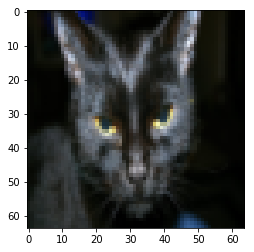

In [6]:
index = 25
example = train_set_x_orig[index]
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [7]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1] # or [2] as both are same bcoz it's a square
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [8]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [9]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [10]:
len(train_set_x)

12288

y = [0], it's a 'non-cat' picture.


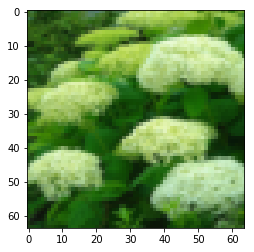

In [11]:
index = 44
example = train_set_x_orig[index]
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

y = [0], it's a 'non-cat' picture.


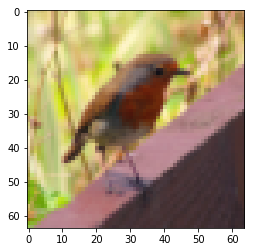

In [12]:
index = 10
example = train_set_x_orig[index]
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

y = [1], it's a 'cat' picture.


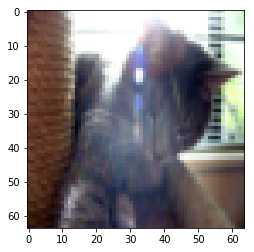

In [13]:
index = 42
example = train_set_x_orig[index]
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

y = [0], it's a 'non-cat' picture.


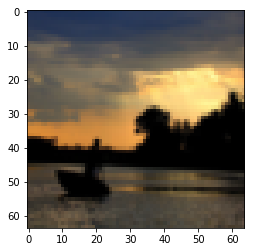

In [14]:
index = 78
example = train_set_x_orig[index]
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

y = [1], it's a 'cat' picture.


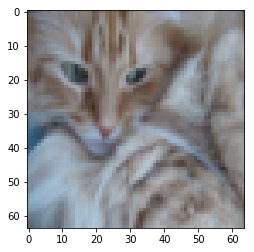

In [15]:
index = 2
example = train_set_x_orig[index]
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [16]:
def sigmoid(z):
    s = 1.0 / (1 + np.exp(-z))
    return s

In [17]:
print("sigmoid[0 3 2] = " + str(sigmoid(np.array([0,3,2]))))

sigmoid[0 3 2] = [0.5        0.95257413 0.88079708]


In [18]:
def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim,1),dtype= np.float32)
    b=0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

In [19]:
dim = 2
w,b = initialize_with_zeros(dim)
print("w = " + str(w))
print("b = " +str(b))

w = [[0.]
 [0.]]
b = 0


In [20]:
def propagate(w,b,X,Y):
    m = X.shape[1]
    
    #Forward propagation
    A = sigmoid(np.dot(w.T,X) + b)
    cost = (-1.0/m) * np.sum((Y*np.log(A)+(1-Y)*np.log(1-A)),axis=1)
    
    #Backward propagation
    dw = (1.0/m) * np.dot(X,((A-Y).T))
    db = (1.0/m) * np.sum(A-Y,axis=1)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    
    return grads, cost

In [21]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = [0.49993523]
cost = 6.000064773192205


In [22]:
m = X.shape[1]
A = sigmoid(np.dot(w.T,X) + b)
print((1. / m)*np.dot(X,(A-Y).T))
print(m)

[[0.99993216]
 [1.99980262]]
2


In [23]:
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost=False):
    
    costs= []
    for i in range(num_iterations):
        grads,cost = propagate(w=w,b=b,X=X,Y=Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w- learning_rate * dw
        b = b- learning_rate * db
        
        
        if i%100==0:
            costs.append(cost)
        if print_cost and i%100==0 :
            print("Cost after %i: %f" %(i,cost))
    
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    
    return params,grads,costs

In [24]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = [1.55930492]
dw = [[0.90158428]
 [1.76250842]]
db = [0.43046207]


In [25]:
def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    [print(x) for x in A]
    print(A.shape[1])
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[0, i] >= 0.5:
            Y_prediction[0, i] = 1
            
        else:
            Y_prediction[0, i] = 0
        ### END CODE HERE ###
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [26]:
print ("predictions = " + str(predict(w, b, X)))

[0.99987661 0.99999386]
2
predictions = [[1. 1.]]


In [32]:
def model(X_train, Y_train,X_test,Y_test, num_iterations = 2000,learning_rate = 0.5, print_cost = False):
    w,b = initialize_with_zeros(X_train.shape[0])
    
    parameters,grads,costs = optimize(w,b,X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)
    
    print("Train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("Test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [33]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after 0: 0.693147
Cost after 100: 0.584508
Cost after 200: 0.466949
Cost after 300: 0.376007
Cost after 400: 0.331463
Cost after 500: 0.303273
Cost after 600: 0.279880
Cost after 700: 0.260042
Cost after 800: 0.242941
Cost after 900: 0.228004
Cost after 1000: 0.214820
Cost after 1100: 0.203078
Cost after 1200: 0.192544
Cost after 1300: 0.183033
Cost after 1400: 0.174399
Cost after 1500: 0.166521
Cost after 1600: 0.159305
Cost after 1700: 0.152667
Cost after 1800: 0.146542
Cost after 1900: 0.140872
[0.94366988 0.86095311 0.88896715 0.93630641 0.74075403 0.52849619
 0.03094677 0.85707681 0.88457925 0.67279696 0.26601085 0.4823794
 0.74741157 0.78575729 0.00978911 0.9203284  0.02453695 0.84884703
 0.2050248  0.03703224 0.92931392 0.11930532 0.01411064 0.7832698
 0.58188015 0.66897565 0.75119007 0.01323558 0.03402649 0.99735115
 0.21031727 0.78123225 0.6815842  0.46647604 0.66323375 0.03424828
 0.08031627 0.76570656 0.34760863 0.06177743 0.6987531  0.4106426
 0.6648871  0.02776868 0.9